In [27]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from __future__ import print_function # use the print() function from Python3
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
import soundfile as sf
from numpy import random
from scipy import signal
import matplotlib.pyplot as plt
from statistics import mean 
import librosa
import scipy.io.wavfile as wavf
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA

In [28]:
from tree_lib import *

In [29]:
df = pd.read_csv("all_features.csv")
df = df.drop(columns=['Unnamed: 0'])
list(df.columns.values)

['expression',
 'rating',
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand']

In [30]:
df

,expression,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,...,avg_bw,avg_ctr,std_ctr,height,leaves,t-count,operators,2_powers,avg_operand,std_operand
0,(t^(t|11))^((t*12)&11),0,0.000000,2397.742187,15.091598,3499.092151,18.751655,0.623013,0.018510,0.000018,...,849.466258,69.718268,38.167484,3.0,3.0,3.0,5.0,0.0,11.0,0.0
1,t*(t/10),5,0.000000,1967.835677,139.002189,3359.908049,107.338253,0.498658,0.056105,0.405539,...,1169.781651,16.963792,2.828404,2.0,1.0,2.0,2.0,0.0,10.0,0.0
2,(t|(t&7))*(t/8),5,0.000000,1973.796906,123.739123,3380.505397,84.243555,0.498456,0.015501,0.297074,...,1174.761842,23.286908,5.089016,3.0,2.0,3.0,4.0,1.0,7.0,0.0
3,((t>>6)-(t^((t>>1)|5)))-((t>>4)&5),10,0.000000,1090.473150,82.708608,2546.341951,161.222079,0.030035,0.003914,0.064719,...,1119.578280,17.700608,5.406530,5.0,5.0,4.0,8.0,2.0,4.0,1.0
4,(t*((3+(1^((t>>10)&5)))*(5+(3&(t>>14)))))>>((t...,80,0.000000,1375.247172,125.774728,2883.745336,125.740284,0.127081,0.045806,0.094418,...,1145.171747,19.485216,3.035491,7.0,9.0,4.0,12.0,2.0,5.0,4.0
5,t>>((t^(t|11))*(((t|8)&(((t>>10)*(t&11))*10))>...,45,58.593750,1405.434159,318.545960,2943.813300,549.612072,0.210597,0.125716,0.014998,...,1211.328055,37.113671,25.308378,7.0,6.0,6.0,11.0,1.0,10.0,1.0
6,((t>>13)>>(t&(t&(t>>15))))|(t>>(t*(t>>12))),10,14.648438,142.246772,125.576124,64.690498,310.284654,0.000122,0.000870,0.000069,...,517.264980,46.739396,34.808292,5.0,3.0,7.0,9.0,0.0,13.0,1.0
7,(t|9)>>((t&9)*7),10,14.648438,1643.016174,79.731008,3641.749400,70.769139,0.279184,0.031679,0.000308,...,1512.211990,71.984035,15.198755,3.0,3.0,2.0,4.0,0.0,8.0,1.0
8,t*(((t>>6)&12)|(((t>>12)&25)^(((t>>10)&12)&(t>...,90,15.120968,1442.582115,280.605665,2862.548308,287.227102,0.120822,0.062164,0.054682,...,1092.622997,52.876133,34.281462,6.0,7.0,5.0,11.0,0.0,13.0,6.0
9,(((t|5)*7)>>8)^((t*6)*11),5,17.045455,2069.834397,107.679454,3613.347881,138.731292,0.513928,0.015297,0.018100,...,1157.059127,22.660011,6.563790,4.0,5.0,2.0,6.0,1.0,7.0,2.0


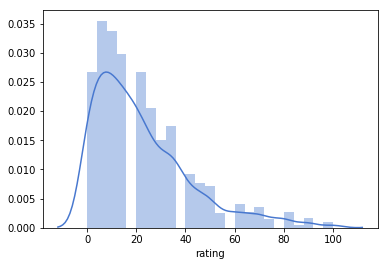

In [81]:
x = df['rating']
sns.distplot(x);

In [36]:
corr = df[['rating', 'height', 'leaves', 't-count', 'operators', '2_powers', 'avg_operand', 'std_operand']].corr()
corr.style.background_gradient(cmap='coolwarm')

,rating,height,leaves,t-count,operators,2_powers,avg_operand,std_operand
rating,1,-0.088981,-0.00182279,-0.0119632,-0.00782507,-0.142907,0.177148,0.139814
height,-0.088981,1,0.604034,0.645945,0.743358,0.238198,-0.0231997,0.0216573
leaves,-0.00182279,0.604034,1,0.405146,0.860405,0.371008,-0.048338,-0.0204445
t-count,-0.0119632,0.645945,0.405146,1,0.814503,0.18155,-0.0311375,0.013115
operators,-0.00782507,0.743358,0.860405,0.814503,1,0.336629,-0.0480303,-0.00566312
2_powers,-0.142907,0.238198,0.371008,0.18155,0.336629,1,-0.144245,-0.0386664
avg_operand,0.177148,-0.0231997,-0.048338,-0.0311375,-0.0480303,-0.144245,1,0.798287
std_operand,0.139814,0.0216573,-0.0204445,0.013115,-0.00566312,-0.0386664,0.798287,1


In [37]:
audio_corr_df = df[['rating','std_cent', 'std_rolloff', 'std_zcross', 'std_flt', 'tempo']].corr()
audio_corr_df.style.background_gradient(cmap='coolwarm')

,rating,std_cent,std_rolloff,std_zcross,std_flt,tempo
rating,1,0.330144,0.253739,0.233578,0.113816,0.0441757
std_cent,0.330144,1,0.759427,0.722088,0.0882293,0.0319906
std_rolloff,0.253739,0.759427,1,0.276805,-0.123041,0.128588
std_zcross,0.233578,0.722088,0.276805,1,0.285604,-0.101615
std_flt,0.113816,0.0882293,-0.123041,0.285604,1,-0.0638587
tempo,0.0441757,0.0319906,0.128588,-0.101615,-0.0638587,1


In [38]:
# ____________________________________LOOKING AT AUDIO FEATURES________________________________________________


In [39]:
audio_clustering_df = df[['std_cent', 'std_rolloff', 'std_zcross', 'std_flt', 'tempo']]

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
scaler = preprocessing.StandardScaler()
scaler.fit_transform(audio_clustering_df)

array([[-1.4910452 , -1.23707764, -0.64551453, -0.61287735, -1.94301496],
       [-0.4624791 , -0.87208462, -0.15084004,  1.93206476, -1.94301496],
       [-0.58917587, -0.96723901, -0.68510654, -0.20995933, -1.94301496],
       ...,
       [-0.55720011, -0.90945055,  0.51532692,  1.60836832,  1.44674745],
       [-1.41955856, -1.12534282, -0.47907666, -0.37553344,  0.17558655],
       [ 0.49153806,  0.11387309,  0.62972698, -0.55838235,  0.17558655]])

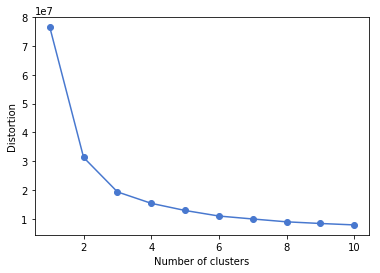

In [41]:
distortions = []
pca = PCA(n_components=3).fit(audio_clustering_df)
pca_5d = audio_clustering_df #pca.transform(audio_clustering_df)
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_5d)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()   

In [42]:
km = KMeans(
        n_clusters=4, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)

In [43]:
km.fit(pca_5d)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [44]:
pca = PCA(n_components=2).fit(audio_clustering_df)
pca_2d = pca.transform(audio_clustering_df)

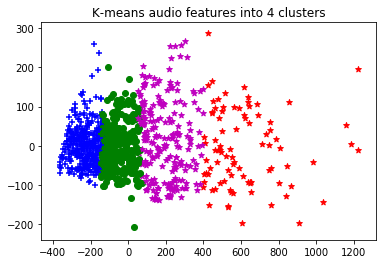

In [45]:
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
        marker='+')
    elif km.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
        marker='o')
    elif km.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
        marker='*')
    elif km.labels_[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m',
        marker='*')
    #pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 2',
        #'Clus ter 3])
        
pl.title('K-means audio features into 4 clusters')
pl.show()

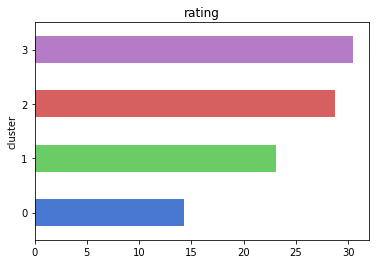

In [46]:
df["cluster"] = km.labels_
ax = df.groupby(['cluster'])['rating'].mean().plot.barh(title = "rating", y = "rating")

In [47]:
centers = pd.DataFrame(km.cluster_centers_, columns = ['std_cent', 'std_rolloff', 'std_zcross', 'std_flt', 'tempo'])
centers

,std_cent,std_rolloff,std_zcross,std_flt,tempo
0,108.905128,105.480447,0.042545,0.017163,103.158193
1,162.957629,269.037356,0.053495,0.016565,96.112109
2,419.448134,890.821973,0.121518,0.008364,110.902296
3,281.729569,488.702248,0.104280,0.014053,128.952315


In [48]:
# ____________________________________LOOKING AT TREE FEATURES________________________________________________

In [49]:
audio_corr_df = df[['height', 'leaves', 't-count', 'operators', '2_powers']].corr()
audio_corr_df.style.background_gradient(cmap='coolwarm')

,height,leaves,t-count,operators,2_powers
height,1,0.604034,0.645945,0.743358,0.238198
leaves,0.604034,1,0.405146,0.860405,0.371008
t-count,0.645945,0.405146,1,0.814503,0.18155
operators,0.743358,0.860405,0.814503,1,0.336629
2_powers,0.238198,0.371008,0.18155,0.336629,1


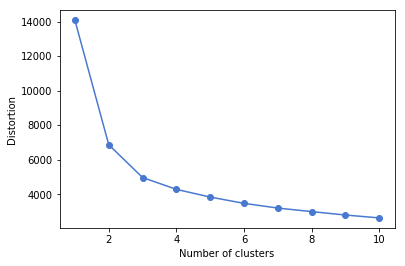

In [50]:
HLtree_clustering_df = df[['height', 'leaves', 't-count', 'operators', '2_powers']]

#
'''
scaler = preprocessing.StandardScaler()
scaler.fit_transform(HLtree_clustering_df)

'''





distortions = []
pca = PCA(n_components=5).fit(HLtree_clustering_df)
pca_5d = HLtree_clustering_df #pca.transform(HLtree_clustering_df)
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_5d)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()   

km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)

km.fit(pca_5d)

pca = PCA(n_components=2).fit(HLtree_clustering_df)
pca_2d = pca.transform(HLtree_clustering_df)

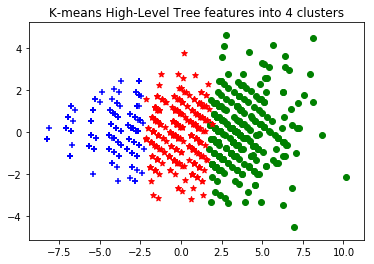

In [51]:
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
        marker='+')
    elif km.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
        marker='o')
    elif km.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
        marker='*')
    elif km.labels_[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m',
        marker='*')
    #pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 2',
        #'Clus ter 3])
        
pl.title('K-means High-Level Tree features into 4 clusters')
pl.show()

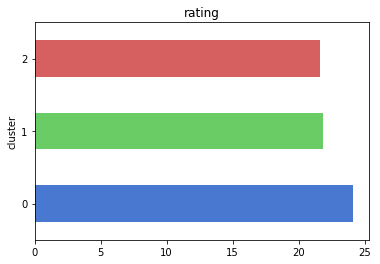

In [52]:
df["cluster"] = km.labels_
ax = df.groupby(['cluster'])['rating'].mean().plot.barh(title = "rating", y = "rating")

In [53]:
centers = pd.DataFrame(km.cluster_centers_, columns = ['height', 'leaves', 't-count', 'operators', '2_powers'])
centers

,height,leaves,t-count,operators,2_powers
0,3.618321,2.896947,3.022901,4.919847,0.782443
1,5.854489,6.244582,5.823529,11.068111,1.743034
2,4.922892,4.619277,4.469880,8.089157,1.132530


In [54]:
LLtree_clustering_df = df[['>>', '*', '&', '^', '%', '|', '-', '+', '/', '2_powers']]

KeyError: "['>>' '*' '&' '^' '%' '|' '-' '+' '/'] not in index"

In [ ]:
'''
scaler = preprocessing.StandardScaler()
scaler.fit_transform(LLtree_clustering_df)

'''


distortions = []
pca = PCA(n_components=3).fit(LLtree_clustering_df)
pca_5d = LLtree_clustering_df#pca.transform(LLtree_clustering_df)
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_5d)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()   





In [ ]:
km = KMeans(
        n_clusters=6, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)

km.fit(pca_5d)

pca = PCA(n_components=2).fit(LLtree_clustering_df)
pca_2d = pca.transform(LLtree_clustering_df)

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
        marker='+')
    elif km.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
        marker='o')
    elif km.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
        marker='*')
    elif km.labels_[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m',
        marker='*')
    
    elif km.labels_[i] == 4:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',
        marker='*')
        
    elif km.labels_[i] == 5:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k',
        marker='*')
        
    #pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 2',
        #'Clus ter 3])
        
pl.title('K-means Low-Level Tree features into 4 clusters')
pl.show()

In [ ]:
df["cluster"] = km.labels_
ax = df.groupby(['cluster'])['rating'].mean().plot.barh(title = "rating", y = "rating")

In [ ]:
centers = pd.DataFrame(km.cluster_centers_, columns = ['>>', '*', '&', '^', '%', '|', '-', '+', '/', '2_powers'])
centers

In [ ]:
combination = df[['height', 'leaves', 't-count', 'operators', '2_powers', '>>', '*', '&', '^', '%', '|', '-', '+', '/']]

In [ ]:
'''
scaler = preprocessing.StandardScaler()
scaler.fit_transform(LLtree_clustering_df)

'''


distortions = []
pca = PCA(n_components=5).fit(combination)
pca_5d = pca.transform(combination)
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_5d)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()   

In [ ]:
km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)

km.fit(pca_5d)

pca = PCA(n_components=2).fit(combination)
pca_2d = pca.transform(combination)

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
        marker='+')
    elif km.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
        marker='o')
    elif km.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
        marker='*')
    elif km.labels_[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m',
        marker='*')
    
    elif km.labels_[i] == 4:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',
        marker='*')
        
    elif km.labels_[i] == 5:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k',
        marker='*')
        
    #pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 2',
        #'Clus ter 3])
        
pl.title('K-means Low-Level Tree features into 4 clusters')
pl.show()

In [ ]:
df["cluster"] = km.labels_
ax = df.groupby(['cluster'])['rating'].mean().plot.barh(title = "rating", y = "rating")

In [ ]:
centers = pd.DataFrame(km.cluster_centers_)
centers

In [ ]:
X = np.array(df[[
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 '2_powers',
 'avg_operand',
 'std_operand',
 '>>',
 '*',
 '&',
 '^',
 '%',
 '|',
 '-',
 '+',
 '/']])

In [ ]:
df

In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# create and plot the data
X = np.array(df[[
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand']])
y = np.array(df[['rating']]).squeeze()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)




scaler = preprocessing.StandardScaler()
scaler.fit_transform(X_train)

scaler.transform(X_test)


# run the SVM
svr_rbf = SVR(C=1, gamma="auto", kernel = "rbf")

parameters = {'C':np.arange(.1,10,.1), 'epsilon': np.arange(0,2,.1)}

clf = RandomizedSearchCV(svr_rbf, param_distributions=parameters,
                            cv=5,
                            n_iter=100,
                            refit=True,
                            return_train_score=False,
                            scoring='neg_mean_squared_error',
                            random_state=1)

clf.fit(X_train, y_train)
print(sorted(clf.cv_results_.keys()))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_epsilon', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [64]:
X

array([[0.00000000e+00, 2.39774219e+03, 1.50915983e+01, ...,
        0.00000000e+00, 1.10000000e+01, 0.00000000e+00],
       [0.00000000e+00, 1.96783568e+03, 1.39002189e+02, ...,
        0.00000000e+00, 1.00000000e+01, 0.00000000e+00],
       [0.00000000e+00, 1.97379691e+03, 1.23739123e+02, ...,
        1.00000000e+00, 7.00000000e+00, 0.00000000e+00],
       ...,
       [1.87500000e+02, 1.99554878e+03, 1.27591219e+02, ...,
        1.00000000e+00, 6.00000000e+00, 1.00000000e+00],
       [1.17187500e+02, 1.10354882e+03, 2.37035404e+01, ...,
        1.00000000e+00, 4.00000000e+00, 1.00000000e+00],
       [1.17187500e+02, 1.06953834e+03, 2.53931923e+02, ...,
        2.00000000e+00, 6.00000000e+00, 1.00000000e+00]])

In [65]:
clf.best_params_

{'epsilon': 1.7000000000000002, 'C': 9.700000000000001}

In [66]:
from sklearn.svm import SVR
svr_rbf = SVR(C=1, gamma="auto", epsilon=.2)
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_train)
y_pred_test = svr_rbf.predict(X_test)
train_error = mean_squared_error(y_train, y_pred)
test_error = mean_squared_error(y_test, y_pred_test)
print("Train error: %d" % train_error)
print("Test error: %d" % test_error)

Train error: 420
Test error: 353


In [67]:
y_pred_test

array([16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.28766009, 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.05115499, 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.20963813, 15.72003097,
       16.0511547 , 15.53382199, 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       14.65373695, 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.55160392, 16.0511547 , 16.0511547 , 16.0511547 ,
       16.0511547 , 16.0511547 , 16.0511547 , 16.0511547 , 16.05

In [68]:
y_test

array([20, 35,  5,  5, 70, 20, 10,  5,  0, 70, 25, 20,  0, 25,  0, 35, 25,
       25,  5, 60, 10, 20,  5, 45,  5, 10, 35,  0, 40,  0, 10, 75,  5,  5,
        5,  0, 40, 10, 45, 15, 70, 30, 50, 10, 40, 25,  0, 15, 10, 10, 15,
       15, 20, 25, 75, 10,  5,  5, 10, 25, 35, 10, 25,  5, 20,  5,  5, 20,
       15, 20, 35,  0, 20, 35, 35, 30,  5,  5, 25, 45, 25, 15, 25, 15, 55,
        5, 15, 20, 20, 70, 20, 25,  5, 10, 25, 35, 20, 20, 15,  0, 35, 20,
       35, 15, 15, 35, 20,  0, 60, 35, 20,  0, 35, 30, 20,  5, 20, 10, 10,
       35, 35, 10, 25, 20, 10, 50,  0, 50,  0, 10, 15, 30, 20, 15, 15, 10,
       45,  5, 25, 15, 10, 15, 15, 25, 20, 20, 10, 15, 20, 60, 15, 20,  0,
       20, 20, 15, 45,  5, 15, 10,  5, 30,  5,  5, 40, 20, 40,  0, 50, 49,
       10, 20, 35, 20,  5, 35, 15, 20,  5,  5, 30, 40, 10,  5, 20, 70, 60,
       60, 45, 20,  5,  0,  0,  0,  5, 50, 80,  5,  0, 20])

In [69]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(
    loss="squared_loss",     # the loss function to be used
    penalty="l1",            # the type of regularization component to use
    max_iter=1000,           # maximal number of epochs
    tol=1e-4,                # tolerance for the stopping condition (stops if it 
                             # can't improve the result more than tol), this speeds 
                             # up model building and is great for prototyping
    alpha = 0,               # regularization strength, low = free model, high = controlled model
    random_state=0           # random seed
)

In [71]:
# create and plot the data
X = np.array(df[[
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 '2_powers',
 'avg_operand',
 'std_operand']])
y = np.array(df[['rating']]).squeeze()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
# Design the pipeline as a sequence of steps each step
# is specified as a tuple ('name',model). We will refer
# to this name later.
pipeline = Pipeline([
    ('mm',   MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ('sgd',  SGDRegressor(penalty="l2",max_iter=1000,tol=1e-4,alpha=1e-3,random_state=0)),
])

# Train using the whole pipeline using just 1 call!
pipeline.fit(X_train,y_train)


array([63.32966209, 55.37474364, 55.25221388, 54.92642124, 58.555419  ,
       55.03340037, 54.90653533, 56.89477745, 55.49903856, 55.7157525 ,
       56.67981365, 58.1363008 , 54.62840646, 57.33306067, 53.96442817,
       54.68533105, 57.67954458, 55.92434939, 54.39172614, 55.68180488,
       53.06858574, 59.91226603, 54.81928674, 54.53727525, 54.32211492,
       54.77287669, 53.97034174, 56.99802542, 56.48664221, 55.10657175,
       56.46020018, 57.51913617, 54.11228927, 55.17621652, 54.97827362,
       54.58490779, 56.38512511, 57.09038005, 55.12608103, 53.38993569,
       55.03520306, 55.36241588, 59.3042684 , 54.06466405, 59.74580508,
       56.6558991 , 54.74505175, 56.4306773 , 56.22383851, 57.77975494,
       57.24646751, 55.41408353, 58.07103713, 56.46054102, 56.51052885,
       57.48240678, 54.8548973 , 54.6749212 , 55.05820846, 54.39672282,
       56.27308681, 54.93799516, 57.30993667, 54.99793276, 55.0143406 ,
       57.18866441, 56.71275254, 56.00438261, 54.8037141 , 57.32

In [73]:
mse = mean_squared_error(pred,y_test)
print(mse)

1459.632170841189


In [74]:
pipeline

Pipeline(memory=None,
         steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('sgd',
                 SGDRegressor(alpha=0.001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=0, shuffle=True, tol=0.0001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [75]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Define the parameter search space using a dictionary with entries:
#    { 'name__parameter' : range }
# name:  refers to the name of the pipeline step in which you are 
#        changing a variable
# range: can be a tuple, a list or a distribution.
parameters = {
    'poly__degree': [1,2],                             #specify the degree of the polynomial here
    'sgd__alpha'   : np.logspace(-5,1,7)   # search range for parameter α
                                           # in the sgd step of the pipeline
}

# set-up the grid-search
grid_search = GridSearchCV(
    pipeline,                             # the ML pipeline we wish to test
    parameters,                              # all parameter settings
    scoring='neg_mean_squared_error', # the scoring metric to calculate
                                      # since this maximizes, we use -MSE
    cv=TimeSeriesSplit(n_splits=3), # how to design the folds
    return_train_score=True           # useful for debugging, calculate the trainset
                                      # performance
)

# start the gridsearch
grid_search.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('mm',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('sgd',
                                        SGDRegressor(alpha=0.001, average=False,
                                                     early_stopping=False,
                                                     epsilon=0...
                                     

In [76]:
grid_search.best_params_

{'poly__degree': 1, 'sgd__alpha': 0.01}

In [77]:
pipeline.set_params(sgd__alpha=grid_search.best_params_['sgd__alpha'], poly__degree=grid_search.best_params_['poly__degree'])
pipeline.fit(X_train,y_train)
Y_hat = pipeline.predict(X_test)

# report the means_squared error on the test-set
pred = pipeline.predict(X_test)
mse  = mean_squared_error(pred, y_test)
print("Pipeline MSE %.2f" % mse)

Pipeline MSE 267.81


In [78]:
pred = pipeline.predict(X_train)
mse  = mean_squared_error(pred, y_train)

In [79]:
print("Pipeline MSE %.2f" % mse)

Pipeline MSE 360.41
